<a href="https://colab.research.google.com/github/samikshawararkar/samikshA/blob/main/HandWrittenDigitPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#Hand Written Digit Prediction

In [39]:
#Classification Analysis

import library

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import data

In [41]:
from sklearn.datasets import load_digits

In [42]:
df=load_digits()

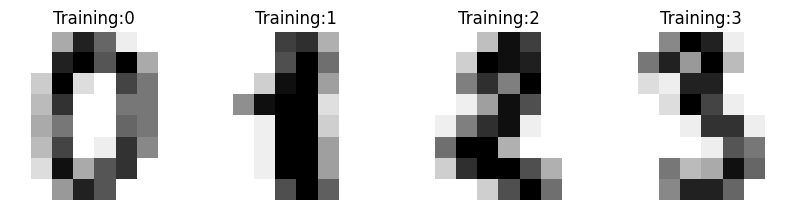

In [64]:
_,axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax, image , label in zip (axes, df.images , df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("Training:%i"% label)

data preprocessing

In [44]:
df.images.shape

(1797, 8, 8)

In [45]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [46]:
df.images[0].shape

(8, 8)

In [47]:
len(df.images)

1797

In [48]:
n_samples=len(df.images)
data= df.images.reshape((n_samples,-1))

In [49]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [50]:
data[0].shape

(64,)

In [51]:
data.shape

(1797, 64)

scaling image data

In [52]:
data.min()

0.0

In [53]:
data.max()

16.0

In [54]:
data=data/16

In [55]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

train test split data

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target , test_size=0.3)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

random forest model

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train , y_train)

RandomForestClassifier()

predict test data

In [60]:
y_pred=rf.predict(X_test)
y_pred

array([7, 1, 1, 5, 3, 8, 3, 4, 7, 2, 8, 6, 4, 5, 0, 2, 6, 6, 6, 5, 6, 2,
       1, 4, 9, 1, 0, 1, 0, 7, 1, 8, 7, 2, 8, 5, 4, 0, 0, 1, 0, 6, 1, 2,
       5, 1, 3, 1, 0, 0, 2, 5, 3, 9, 6, 2, 7, 8, 0, 3, 3, 7, 2, 4, 1, 3,
       2, 0, 3, 4, 4, 8, 9, 9, 6, 4, 1, 4, 4, 8, 7, 6, 3, 3, 9, 2, 6, 0,
       6, 6, 4, 1, 3, 6, 5, 7, 7, 5, 6, 1, 8, 9, 1, 8, 5, 9, 6, 4, 0, 8,
       4, 9, 3, 3, 8, 5, 2, 7, 6, 3, 9, 2, 5, 5, 4, 0, 5, 6, 5, 7, 2, 3,
       3, 5, 1, 7, 4, 7, 5, 7, 2, 1, 1, 0, 7, 4, 5, 6, 5, 6, 7, 3, 5, 3,
       2, 2, 4, 2, 2, 1, 3, 2, 6, 3, 4, 0, 5, 5, 6, 0, 2, 1, 0, 9, 9, 0,
       5, 5, 2, 5, 8, 6, 7, 8, 1, 9, 5, 3, 7, 7, 1, 3, 3, 4, 5, 2, 6, 9,
       0, 2, 1, 8, 0, 2, 0, 9, 5, 1, 3, 8, 5, 7, 9, 7, 1, 4, 5, 6, 2, 6,
       2, 8, 0, 5, 2, 0, 9, 4, 2, 7, 5, 9, 0, 3, 1, 9, 3, 4, 1, 7, 0, 7,
       4, 3, 7, 8, 1, 7, 2, 8, 6, 5, 4, 4, 7, 1, 7, 4, 2, 3, 0, 6, 4, 6,
       1, 5, 5, 6, 8, 3, 0, 6, 9, 4, 9, 5, 6, 3, 1, 9, 4, 2, 7, 7, 8, 9,
       2, 6, 6, 0, 2, 2, 9, 8, 3, 3, 5, 9, 5, 4, 3,

model accuracy

In [61]:
from sklearn.metrics import confusion_matrix, classification_report


In [62]:
confusion_matrix(y_test, y_pred)

array([[48,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 57,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 53,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 60,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  1, 61,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 54]])

In [63]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.96      1.00      0.98        48
           2       1.00      1.00      1.00        57
           3       0.98      0.98      0.98        54
           4       0.96      1.00      0.98        54
           5       0.95      0.98      0.97        61
           6       0.98      0.95      0.97        64
           7       1.00      1.00      1.00        55
           8       1.00      0.95      0.97        41
           9       0.98      0.95      0.96        57

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

